In [59]:
import numpy as np
import pandas as pd

In [60]:
# Load Dataset
Hitters = pd.read_csv("https://storage.googleapis.com/dimensionless/Analytics/Hitters.csv", index_col=0)

In [61]:
Hitters .head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
Hitters.shape

(322, 20)

In [6]:
Hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [62]:
Hitters = Hitters.dropna()    # drop na values in salary variable

In [63]:
Hitters.Salary = np.log(Hitters.Salary)     # Convert the salary varible to log scale 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C898CC9AC8>]],
      dtype=object)

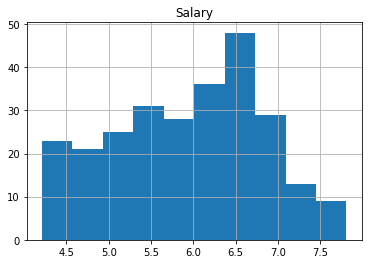

In [64]:
import matplotlib.pyplot as plt
Hitters.hist('Salary')

## Creating feature matrix (X) and target array (y)

In [65]:
X = Hitters.copy() 

In [67]:
del X['Salary']

KeyError: 'Salary'

In [68]:
X = pd.get_dummies(X,columns=['League','Division','NewLeague'],drop_first=True)
X.shape
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [69]:
y=Hitters.Salary

## Spliting Dataset into train and test

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 19), (53, 19), (210,), (53,))

## 1.  Ridge Regularization 

In [72]:
from sklearn import linear_model

In [73]:
ridge_reg =linear_model.Ridge(alpha=0.1,normalize=True) 
ridge_reg.fit(X_train,y_train)
ridge_reg.coef_

array([ 6.12617245e-05,  4.10773496e-03,  6.12672003e-03,  2.50400408e-03,
        6.78041467e-04,  3.77200507e-03,  4.76654592e-02,  3.82632841e-05,
        1.59866703e-04, -2.02560983e-04,  2.10344682e-04,  1.51941976e-04,
       -2.15162092e-04,  2.47584758e-04,  2.62936543e-04, -9.71408623e-03,
        2.05083637e-01, -1.70167927e-01, -1.11316706e-01])

In [74]:
ridge_reg.score(X_train,y_train)

0.5681673477646032

### Apply CV for alpha value

In [77]:
import random
np.random.seed(42)
regCV = linear_model.RidgeCV(alphas=[0.01,0.001,0.1, 1.0, 10.0,100,1000,10000],cv=5,normalize=True)
regCV.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-02, 1.e-03, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [78]:
regCV.alpha_       # get the best lambda value

1.0

In [79]:
# building the new model with the best alpha value
ridgecv =linear_model.Ridge(alpha=1,normalize=True) 
ridgecv.fit(X_train,y_train)
ridgecv.score(X_train,y_train) 

0.5299721171936403

In [80]:
y_predcv = ridgecv.predict(X_test)     # predictions on test data

In [81]:
SSE_cv = sum((y_test-y_predcv)**2)
SST = sum((y_test-np.mean(y_train))**2)

In [82]:
r2_cv = 1- SSE_cv/SST 
r2_cv

0.3839136843507023

In [25]:
RMSE_cv = np.sqrt(SSE_cv/X_test.shape[0])
RMSE_cv

0.6299458358659994

### Plotting Ridge Regularization for different alpha values

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
n_alphas = 200
alphas = np.logspace(-1, 4, n_alphas)

In [85]:
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a,normalize=True)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

In [86]:
data = pd.DataFrame(coefs,columns=X_train.columns,index=alphas)

In [87]:
data['alphas'] = data.index

In [88]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N,alphas
0.100000,0.000061,0.004108,0.006127,0.002504,0.000678,0.003772,0.047665,0.000038,0.000160,-0.000203,0.000210,0.000152,-0.000215,0.000248,0.000263,-0.009714,0.205084,-0.170168,-0.111317,0.100000
0.105956,0.000082,0.004019,0.005943,0.002524,0.000749,0.003693,0.046821,0.000038,0.000159,-0.000195,0.000209,0.000153,-0.000200,0.000246,0.000259,-0.009620,0.200777,-0.169069,-0.107298,0.105956
0.112267,0.000101,0.003933,0.005765,0.002543,0.000818,0.003616,0.045970,0.000038,0.000158,-0.000187,0.000209,0.000154,-0.000185,0.000245,0.000254,-0.009521,0.196438,-0.167939,-0.103262,0.112267
0.118953,0.000120,0.003850,0.005592,0.002560,0.000884,0.003542,0.045115,0.000038,0.000157,-0.000178,0.000208,0.000155,-0.000170,0.000243,0.000250,-0.009416,0.192074,-0.166777,-0.099215,0.118953
0.126038,0.000139,0.003768,0.005425,0.002575,0.000948,0.003470,0.044257,0.000038,0.000156,-0.000169,0.000208,0.000156,-0.000155,0.000242,0.000245,-0.009307,0.187691,-0.165583,-0.095165,0.126038


In [45]:
y_var = data.columns.difference(['alphas'])
y_var

Index(['Assists', 'AtBat', 'CAtBat', 'CHits', 'CHmRun', 'CRBI', 'CRuns',
       'CWalks', 'Division_W', 'Errors', 'Hits', 'HmRun', 'League_N',
       'NewLeague_N', 'PutOuts', 'RBI', 'Runs', 'Walks', 'Years'],
      dtype='object')

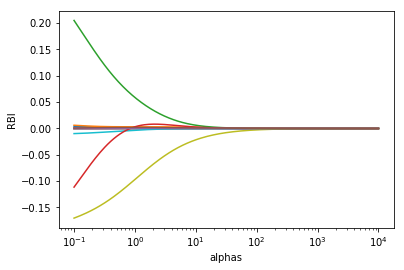

In [46]:
ax= plt.gca()
ax.set_xscale('log')
for i in range(0,16):
    ax=sns.lineplot(data=data, x='alphas', y=y_var[i])

## 2. Lasso Regularization

In [89]:
reg_lasso = linear_model.Lasso(alpha=0.001,normalize=True)

In [90]:
reg_lasso.fit(X_train,y_train)
reg_lasso.score(X_train,y_train)

0.5663628195123309

In [91]:
reg_lasso.coef_

array([ 0.        ,  0.00656282,  0.00632136,  0.        ,  0.        ,
        0.00381967,  0.06725225,  0.        ,  0.00023146,  0.        ,
        0.        ,  0.        , -0.        ,  0.00020624,  0.        ,
       -0.00506642,  0.10040307, -0.16384799, -0.00492344])

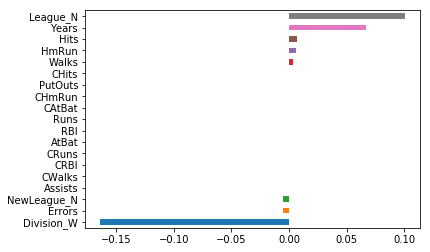

In [92]:
# plotting the model coefficients
coef = pd.Series(reg_lasso.coef_,X_train.columns)
coef.sort_values(ascending=True,inplace=True)
coef.plot.barh()

In [98]:
# Apply CV for best alpha value
np.random.seed(42)
reg_lassoCV = linear_model.LassoCV(alphas=[0.0001,0.001,0.01,0.1,1],max_iter=10000,cv=5,normalize=True)
reg_lassoCV.fit(X_train,y_train)

LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1], copy_X=True, cv=5, eps=0.001,
    fit_intercept=True, max_iter=10000, n_alphas=100, n_jobs=None,
    normalize=True, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [99]:
reg_lassoCV.alpha_

0.001

In [32]:
y_pred_lasso=reg_lasso.predict(X_test)

In [33]:
SSE_lasso = sum((y_test-y_pred_lasso)**2)

In [34]:
r2_lasso = 1- SSE_lasso/SST 
r2_lasso

0.35231171821772844

In [35]:
RMSE_lasso = np.sqrt(SSE_lasso/X_test.shape[0])
RMSE_lasso

0.6459002432220396

### Plotting Lasso Regularization for different alpha values

In [93]:
nalpha = 200 
alphas = np.logspace(-4,-1,nalpha)
alphas[:10]

array([0.0001    , 0.00010353, 0.00010719, 0.00011098, 0.0001149 ,
       0.00011895, 0.00012316, 0.00012751, 0.00013201, 0.00013667])

In [97]:
coef = []
for a in alphas:
    reg = linear_model.Lasso(alpha=a,max_iter=10000,normalize=True)
    reg.fit(X_train,y_train)
    coef.append(reg.coef_)
#coef[:10]

In [95]:
df_coef = pd.DataFrame(coef,index=alphas,columns=X_train.columns)

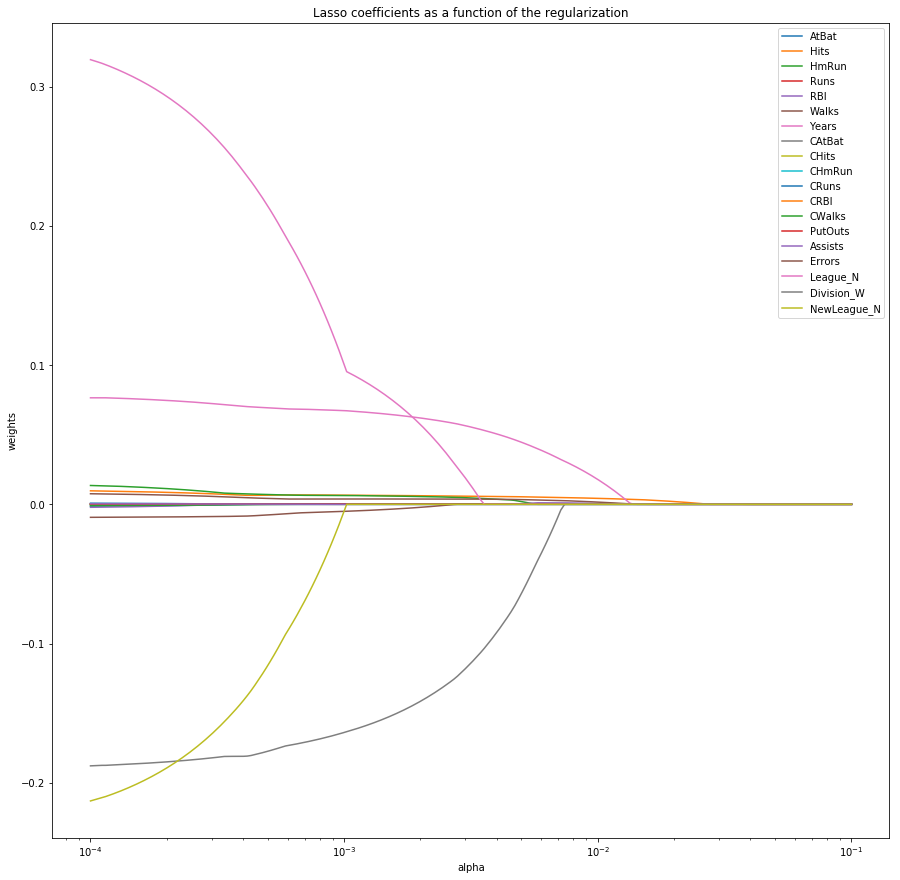

In [96]:
plt.figure(figsize=(15,15))
ax = plt.gca()
ax.plot(df_coef.index,df_coef.values)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
ax.get_ymajorticklabels()
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(df_coef.columns)
plt.show()
